# Concrete Strength Prediction

### In this notebook I created and tested multiple models that can predict the compressive strength of concrete based on multiple features.

### I used the Concrete Strength Dataset

## Importing libraries & Reading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [2]:
conc_train = pd.read_csv('train.csv')
conc_test = pd.read_csv('test.csv')

conc_train.head()

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19


## Data Wrangling & Cleaning

In [3]:
ID = conc_test['id']     ##Stored the test id column in a variable before dropping it to use in submission csv

conc_train.drop('id',axis=1,inplace=True)  ##Dropped id column 
conc_test.drop('id',axis=1,inplace=True)

In [4]:
conc_train.shape ##Inspect dimensions

(5407, 9)

In [5]:
conc_train.duplicated().sum() #Check for duplicates

0

In [6]:
conc_train.isna().sum() #Check for missing values

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

## Feature Engineering

In [7]:
conc_train['CementAge'] = conc_train['CementComponent'] * conc_train['AgeInDays']  #Engineered 2 features that increased accuracy
conc_train['WaterAge'] = conc_train['WaterComponent'] * conc_train['AgeInDays']    #in validation
conc_train.drop('WaterComponent',axis = 1,inplace = True)                          #Dropped 1 feature that also increased accuracy
                                                                                   #in validation
conc_test['CementAge'] = conc_test['CementComponent'] * conc_test['AgeInDays']
conc_test['WaterAge'] = conc_test['WaterComponent'] * conc_test['AgeInDays']
conc_test.drop('WaterComponent',axis = 1,inplace = True)

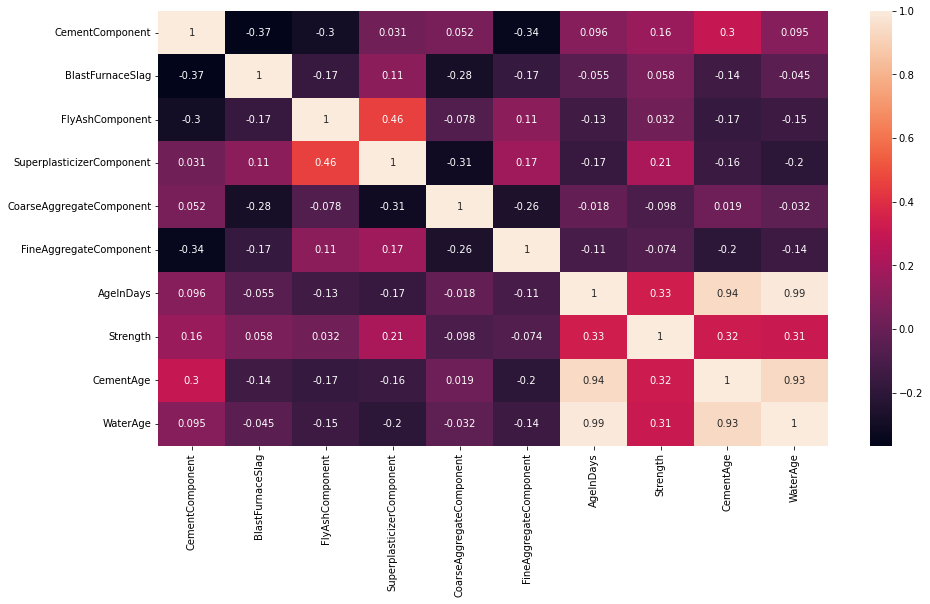

In [8]:
matrix = conc_train.corr() #Check correlation

plt.figure(figsize=(15,8))
sns.heatmap(matrix,annot=True)
plt.show()

In [9]:
conc_train.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,CementAge,WaterAge
count,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000
mean,299.168189,58.610579,31.872795,4.108441,992.000718,771.219974,51.751618,35.452071,16194.549380,9883.324727
std,105.537682,83.417801,54.605003,5.692296,77.148010,78.725253,70.006975,16.401896,25399.857861,14200.685193
min,102.000000,0.000000,0.000000,0.000000,801.000000,594.000000,1.000000,2.330000,306.000000,173.000000
25%,213.700000,0.000000,0.000000,0.000000,938.200000,734.300000,7.000000,23.640000,2779.000000,1400.000000
50%,297.200000,0.000000,0.000000,0.000000,978.000000,781.200000,28.000000,33.950000,7952.000000,5199.600000
75%,375.000000,122.600000,79.000000,8.050000,1047.000000,821.000000,56.000000,45.850000,16500.000000,10556.000000
max,540.000000,359.400000,200.100000,32.200000,1145.000000,992.600000,365.000000,82.600000,197100.000000,83220.000000


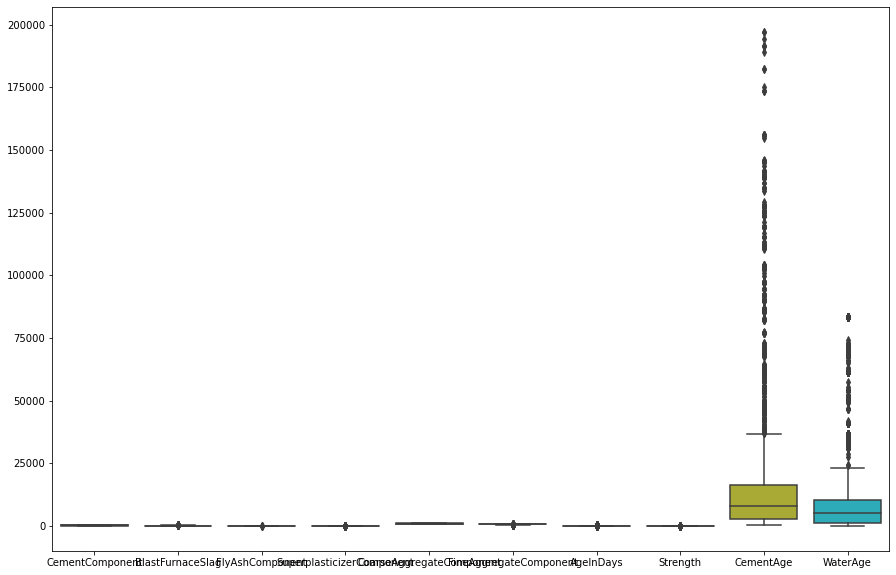

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(data=conc_train);  #Boxplot to inspect outliers
plt.show()

## Modelling

In [11]:
X= conc_train.drop('Strength', axis =1)  #Split Features and Target
y= conc_train['Strength']

In [12]:
ridge = RidgeCV()                       #Created model variables
lasso = LassoCV()
dt = DecisionTreeRegressor(max_depth = 4)
knn = KNeighborsRegressor(n_neighbors= 9)
rf = RandomForestRegressor(max_depth = 6, n_estimators = 90, random_state = 73)
gbr = GradientBoostingRegressor(max_depth = 3, n_estimators = 50, random_state = 37)
lr = LinearRegression()

In [13]:
print("RidgeCV score = ", cross_val_score(ridge, X, y, cv=5, scoring = 'neg_root_mean_squared_error').mean()*-1)
print("LassoCV score = ", cross_val_score(lasso, X, y, cv=5, scoring = 'neg_root_mean_squared_error').mean()*-1)
print("DecisionTreeRegressor score = ", cross_val_score(dt, X, y, cv=5, scoring = 'neg_root_mean_squared_error').mean()*-1)
print("KNeighborsRegressor score = ", cross_val_score(knn, X, y, cv=5, scoring = 'neg_root_mean_squared_error').mean()*-1)
print("RandomForestRegressor score = ", cross_val_score(rf, X, y, cv=5, scoring = 'neg_root_mean_squared_error').mean()*-1)
print("GradientBoostingRegressor score = ", cross_val_score(gbr, X, y, cv=5, scoring = 'neg_root_mean_squared_error').mean()*-1)
print("Linear Regression score = ", cross_val_score(lr, X, y, cv=5, scoring = 'neg_root_mean_squared_error').mean()*-1)

RidgeCV score =  14.436041196572699
LassoCV score =  15.527473784465514
DecisionTreeRegressor score =  12.49503252653801
KNeighborsRegressor score =  12.559928686812501
RandomForestRegressor score =  12.164135702573425
GradientBoostingRegressor score =  12.13211166122663
Linear Regression score =  14.4360374069846


**Seems like Lasso has the highest score.**

In [14]:
lasso.fit(X,y)                    #Using test set to make prediction
y_pred = lasso.predict(conc_test)

In [15]:
pred = pd.DataFrame({'id':ID,'Strength':y_pred}) #Creating prediction dataset
pred.head()

,id,Strength
0,5407,34.332471
1,5408,32.431507
2,5409,33.409805
3,5410,37.763826
4,5411,32.977793


In [17]:
pred.to_csv('ConcretePrediction.csv',index=False) #Submission csv